In [69]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle


In [70]:
csv_file_path = 'C:\\Users\\hp\\OneDrive\\Desktop\\assM\\car_information.csv'
df = pd.read_csv(csv_file_path, encoding='utf-8')
df.head(5)

,Model,Year,Price,Additions,Previous Owners,Offered,Payment Method,Number of Passengers,Car Mileage,Engine Power,Glass,Transmission Type,Car License,Car Origin,Fuel Type,Car Color,Third Party,Comprehensive (Vehicle Body),Total Insurance
0,كيا اوبتيما,2014,100000.0,"مُكيّف, إغلاق مركزي, جهاز إنذار, مسجل CD, فتحة...",يد اولى,للبيع فقط,نقدا فقط,4+1,75000,2000.0,الكتروني,اوتوماتيك,فلسطينية,خصوصي,بنزين,أبيض عاجي,1340.0,1751.0,3090.0
1,معرض السيارات,فلسطين,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,معرض السيارات,فلسطين,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,كيا سورينتو,2007,60000.0,"مُكيّف, إغلاق مركزي, جهاز إنذار, مسجل CD, فتحة...",2,للبيع أو التبديل,إمكانية التقسيط,7+1,130000,2500.0,الكتروني,نصف اوتوماتيك,فلسطينية,خصوصي,ديزل,سكني,1690.0,1050.0,2740.0
4,هونداي افانتي,2006,43500.0,"مُكيّف, إغلاق مركزي, جهاز إنذار, مسجل CD, جنطا...",NaN,للبيع فقط,نقدا فقط,NaN,NaN,1600.0,الكتروني,اوتوماتيك,فلسطينية,خصوصي,بنزين,سكني,1340.0,1000.0,2340.0


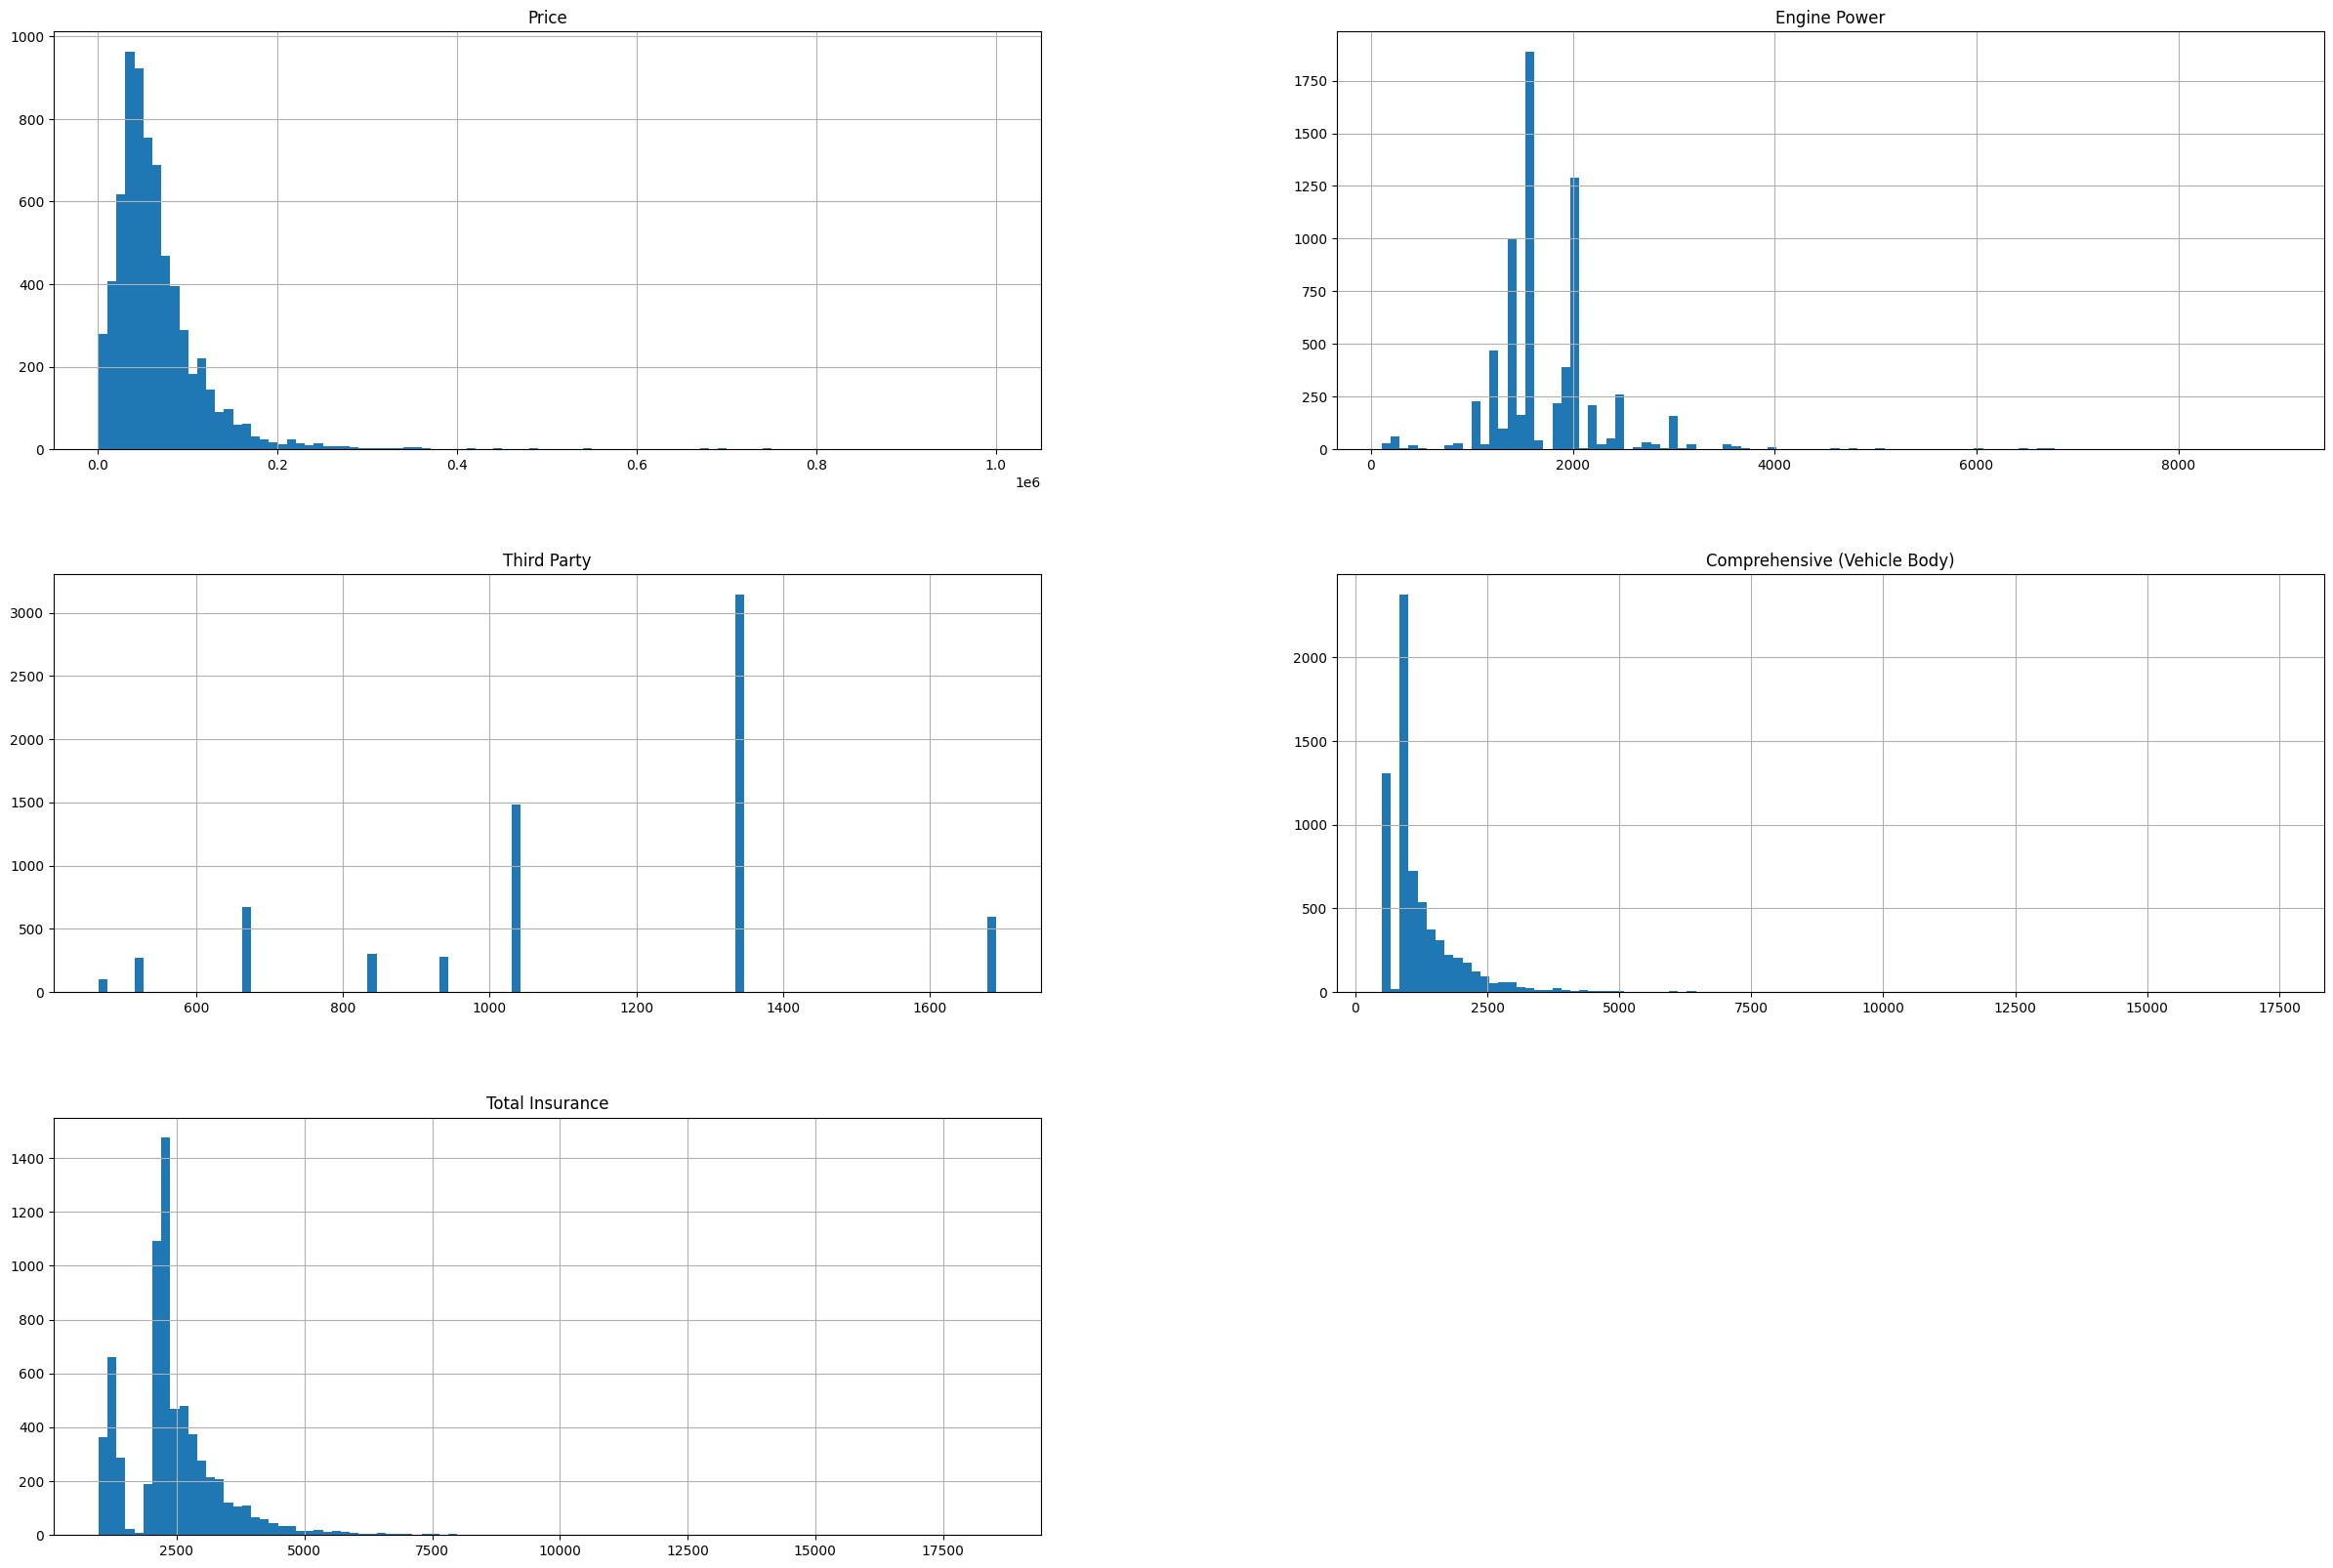

In [71]:
df.hist(bins=100,figsize=(30,20))
plt.show()

In [72]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7777 entries, 0 to 7776
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Model                         7777 non-null   object 
 1   Year                          7777 non-null   object 
 2   Price                         6864 non-null   float64
 3   Additions                     6363 non-null   object 
 4   Previous Owners               5214 non-null   object 
 5   Offered                       6864 non-null   object 
 6   Payment Method                6864 non-null   object 
 7   Number of Passengers          6087 non-null   object 
 8   Car Mileage                   4923 non-null   object 
 9   Engine Power                  6864 non-null   float64
 10  Glass                         6864 non-null   object 
 11  Transmission Type             6864 non-null   object 
 12  Car License                   6864 non-null   object 
 13  Car

# Data cleaning

In [73]:
#  Remove rows where the 'model' column is equal to 'معرض السيارات '
df = df[df['Model'] != 'معرض السيارات']

In [74]:
print(df.isnull().sum())

Model                              0
Year                               0
Price                              0
Additions                        501
Previous Owners                 1650
Offered                            0
Payment Method                     0
Number of Passengers             777
Car Mileage                     1941
Engine Power                       0
Glass                              0
Transmission Type                  0
Car License                        0
Car Origin                         0
Fuel Type                          0
Car Color                          0
Third Party                       11
Comprehensive (Vehicle Body)      11
Total Insurance                   11
dtype: int64


In [75]:
# Create a copy of the rows with NaN values in the 'Additions' column
dropped_rows_Additions = df[df['Additions'].isna()].copy()
df.dropna(subset=['Additions'], inplace=True)

In [76]:
unique_values = set(', '.join(df['Additions']).replace(',,', ',').split(', '))

# Create new columns based on unique values And convert it to English
for value in unique_values:
    df[value] = df['Additions'].apply(lambda x: 1 if value in x else 0)

arabic_to_english_columns = {
    'إغلاق مركزي': 'Central Locking',
    'جنطات مغنيسيوم': 'Alloy Wheels',
    'جهاز إنذار': 'Alarm',
    'فتحة سقف': 'Sunroof',
    'فرش جلد': 'Leather Seats',
    'مسجل CD': 'CD Player',
    'مُكيّف': 'Air Conditioning',
    'وسادة حماية هوائية': 'Airbags',
}
df = df.rename(columns=arabic_to_english_columns)

In [77]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6363 entries, 0 to 7776
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Model                         6363 non-null   object 
 1   Year                          6363 non-null   object 
 2   Price                         6363 non-null   float64
 3   Additions                     6363 non-null   object 
 4   Previous Owners               4949 non-null   object 
 5   Offered                       6363 non-null   object 
 6   Payment Method                6363 non-null   object 
 7   Number of Passengers          5692 non-null   object 
 8   Car Mileage                   4704 non-null   object 
 9   Engine Power                  6363 non-null   float64
 10  Glass                         6363 non-null   object 
 11  Transmission Type             6363 non-null   object 
 12  Car License                   6363 non-null   object 
 13  Car Orig

In [78]:
df = pd.concat([df, dropped_rows_Additions], ignore_index=True)

In [79]:
df = df.drop('Additions', axis=1)

In [80]:
print(df.isnull().sum())

Model                              0
Year                               0
Price                              0
Previous Owners                 1650
Offered                            0
Payment Method                     0
Number of Passengers             777
Car Mileage                     1941
Engine Power                       0
Glass                              0
Transmission Type                  0
Car License                        0
Car Origin                         0
Fuel Type                          0
Car Color                          0
Third Party                       11
Comprehensive (Vehicle Body)      11
Total Insurance                   11
Alarm                            501
CD Player                        501
Air Conditioning                 501
Leather Seats                    501
Airbags                          501
Sunroof                          501
Alloy Wheels                     501
Central Locking                  501
dtype: int64


In [81]:
cleaned_data = df.copy()

In [82]:
#Calculate the correlation matrix for selected columns in the 'cleaned_data' DataFrame
correlation_matrix = cleaned_data[[ 'Price','Third Party','Comprehensive (Vehicle Body)','Total Insurance']].corr()
print(correlation_matrix)

                                 Price  Third Party  \
Price                         1.000000     0.413293   
Third Party                   0.413293     1.000000   
Comprehensive (Vehicle Body)  0.966538     0.459642   
Total Insurance               0.926105     0.669785   

                              Comprehensive (Vehicle Body)  Total Insurance  
Price                                             0.966538         0.926105  
Third Party                                       0.459642         0.669785  
Comprehensive (Vehicle Body)                      1.000000         0.967328  
Total Insurance                                   0.967328         1.000000  


In [83]:
# use a correlation to fill a numerical data by related feature
cleaned_data['Comprehensive (Vehicle Body)'] = cleaned_data['Comprehensive (Vehicle Body)'].fillna(cleaned_data.groupby('Price')['Comprehensive (Vehicle Body)'].transform(lambda x: x.mode().iloc[0]))
cleaned_data['Total Insurance'] = cleaned_data['Total Insurance'].fillna(cleaned_data.groupby('Price')['Total Insurance'].transform(lambda x: x.mode().iloc[0]))
cleaned_data['Third Party'] = cleaned_data['Third Party'].fillna(cleaned_data.groupby('Total Insurance')['Third Party'].transform(lambda x: x.mode().iloc[0]))

In [84]:
print(cleaned_data.isnull().sum())

Model                              0
Year                               0
Price                              0
Previous Owners                 1650
Offered                            0
Payment Method                     0
Number of Passengers             777
Car Mileage                     1941
Engine Power                       0
Glass                              0
Transmission Type                  0
Car License                        0
Car Origin                         0
Fuel Type                          0
Car Color                          0
Third Party                        0
Comprehensive (Vehicle Body)       0
Total Insurance                    0
Alarm                            501
CD Player                        501
Air Conditioning                 501
Leather Seats                    501
Airbags                          501
Sunroof                          501
Alloy Wheels                     501
Central Locking                  501
dtype: int64


In [85]:
cleaned_data.head(5)

,Model,Year,Price,Previous Owners,Offered,Payment Method,Number of Passengers,Car Mileage,Engine Power,Glass,...,Comprehensive (Vehicle Body),Total Insurance,Alarm,CD Player,Air Conditioning,Leather Seats,Airbags,Sunroof,Alloy Wheels,Central Locking
0,كيا اوبتيما,2014,100000.0,يد اولى,للبيع فقط,نقدا فقط,4+1,75000,2000.0,الكتروني,...,1751.0,3090.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,كيا سورينتو,2007,60000.0,2,للبيع أو التبديل,إمكانية التقسيط,7+1,130000,2500.0,الكتروني,...,1050.0,2740.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,هونداي افانتي,2006,43500.0,NaN,للبيع فقط,نقدا فقط,NaN,NaN,1600.0,الكتروني,...,1000.0,2340.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,فيات 127,1982,5500.0,00,للبيع فقط,إمكانية التقسيط,4+1,شغال,906.0,يدوي,...,500.0,967.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,بيجو 208,2014,54000.0,NaN,للبيع فقط,نقدا فقط,4+1,38000,1200.0,الكتروني,...,1000.0,2035.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [86]:
Previous_Owners_unq=cleaned_data['Previous Owners'].unique()
Previous_Owners_unq[:100]

array(['يد اولى', '2', nan, '00', '0', '1', 'يد ثانية', '4', 'يد ثانيه',
       '3', 'ثالثة', 'غير منمر استيراد الماني', 'غير منمرة', 'أولى',
       'يد اولا', 'يد ثالثة', 'ثانية', 'يد أولى', 'يد سادسة', '5', 'اولى',
       'صفر', '9', '0000', 'رابعه', '٤', 'يد رابعة', '٢', 'يد ثالثه', '6',
       '7', '...', 'يد أولى استيراد', 'يد اولي 1', '......', 'ثانيه',
       'واحد', 'اربعة', 'اولا', '٣', 'غير منمره', 'يد تالته', '٦',
       'يد رابعه', 'يد ثالثة ( فتيات)', '159000', '12', '-', 'مش منمر',
       '0 مستورده', 'يد تانيه', '10', 'يد 1', 'مستورد', 'يد 4', '00000',
       '١', 'استيراد مباشر من كوريا', 'يد خامسة', '٥', '********', 'نعم',
       'مش منمرة', 'يد 3', 'يداولى', 'يد أولى وكالة', 'يد خامسه', '٩',
       '٧', 'يدو اولى', 'للبيع', '8', 'يد واله', 'مش منمره', 'ثالثه',
       'اول', '11', '٠', 'رابعة', 'منمره', '0مستورد', '03', 'يد 2',
       'يد ولا', 'يد عاشره', 'يدثانيه', 'لا يوجد', '56', '.', '١١',
       'لايوجد', 'مستورد شركة', '13', '١٠', 'ايد ثانيه', 'يد صفر',
       '

In [87]:
# Modify the data entered in Previous Owners and replace it to a correct value
cleaned_data['Previous Owners'] = cleaned_data['Previous Owners'].replace(['مستوردة يد اولى','أستيراد ألماني','استيراد كوري','مستورد','استيراد','استيراد الماني','مستوردة','يد ولى','مش منمره','مستورده','استيراد مباشر من كوريا','يد اولى صفر كيلو','0 مستورد كوري','مستوردة غير مرخصة','مش منمرا','يد اولى  اصل شركة','مستود غير منمر','يد اولى شركة','مستورد شركة','غير منمر','مستورد','منمره','مش منمرة','مش منمر','غير منمره','يد أولى استيراد','غير منمرة','غير منمر استيراد الماني','يد اولى', 'أولى', 'يد اولا', 'يد أولى', 'يد اولي 1','واحد','اولا','يد 1','١','يداولى','يدو اولى','يد واله','اول','يد ولا','يد. اولى','ياولى','يد اول','يد اولي','يد اولى اصحاب سابقون 0','اوله','يداولا','وارد كوريا يد اولى','يد ولى 0','استراد شخصي','مستورده يد اولى','ايد اولى','يد أولئ أصحاب سابقون صفر','استيراد','يد أولى بعد الاستيراد','انا','يد أولى 1','يد أولي','استيراد كوريا','استيراد مباشر من اوروبا','يد أولئ','يد اولى فقط','استراد','يد أولى،...','اولى','يد ا','يد اوله','فقط يد اولى','يد اولى، استيراد شخصي','سحب شركة','ا','يد اولئ','يد اولى ( شركة )','مستورده','يد٥','يدأولى','استيراد مباشر','اصل شركة','مستوردة غير منمرة','يد ١','يد واحدة','استيراد كوريا - جديد مش منمر','يد','يداولى سحب شركه','يد اولى استيراد شخصي','استيراد كوري','ايد أولى','11111','استيراد المانيا','يد اولة','يد  ١','يد اولى الماني','01','يد اولىً','غير منمرمستوردة','يد واحد','يد اةلي','يدى اوله','مش منمر . (صفر)','يد اولى / استيراد','أولى','ايد اوله','مستوردة يد اولى 1','4 نفس الشخص','بد اولى مستورد','0 استيراد','يد اولى من الشركة المتحدة','مستورد'], '1')
cleaned_data['Previous Owners'] = cleaned_data['Previous Owners'].replace(['0000000','Zero','لا شيء','يد اولى وكالة','Ooo','00','صفر','0000','00000','يد أولى وكالة','لا يوجد','لايوجد','يد صفر','000000','اصحاب سابقون صفر','صفرض','يد ولى 0','00000000','من الشركه مباشر لا يوجد اصحاب سابقون','يد 0','O','صفرر','، 0',], '0')
cleaned_data['Previous Owners'] = cleaned_data['Previous Owners'].replace(['يد ثالثي','3,','ثالثى','ايد 3','ايد ثالثة','تالثه','ايد ثالثه','يد التالته','يد٣','يدثالثه','ثالث','يد ٣','تالته','عدد٣','يد ثالث','يدثالثة','يد3','03','ثالثه','يد 3','يد ثالثة ( فتيات)','٣','يد تالته','يد ثالثه','يد ثالثه','ثالثة','يد ثالثة'], '3')
cleaned_data['Previous Owners'] = cleaned_data['Previous Owners'].replace(['٢','تانية','يديانيه','يد ثانيه','يد ثانية','ثانية','ثانيه','يد تانيه','يد 2','يدثانيه','ايد ثانيه','يد 2','اثنان','يد تاني','يد ثني','يد ثاتيه','يد تانية','ايد 2','أيد تانية','يدثانية','تانيه','يدتانيه','يد ثاني','ثانبه','ايد ثانية','تانبه','يد٢','يد ثانيا','يد2','ايدثانيه','تاني','ثاني','يد  ثانية','يديانيه 0','الثانية'], '2')
cleaned_data['Previous Owners'] = cleaned_data['Previous Owners'].replace(['04','يد اربعه','ايد رابعه','يد٤','يد ٤','يد ٤ بس نخب السيارة','يد4','رابعة','يد 4','يد رابعة','اربعة','يد رابعه','رابعه','٤'], '4')
cleaned_data['Previous Owners'] = cleaned_data['Previous Owners'].replace(['يد ٥','خامسه','خمس','خامسة','خمسة','يدخامسه','خمسه','يد خمسة','يد خامساً','٥','يد خامسه','يد 5','يد خامسة'], '5')
cleaned_data['Previous Owners'] = cleaned_data['Previous Owners'].replace(['يد 6','يد6','٦','يد سادسة'], '6')
cleaned_data['Previous Owners'] = cleaned_data['Previous Owners'].replace(['يد سابعه','سابعه','يد ٧','٧','يد سابعة'], '7')
cleaned_data['Previous Owners'] = cleaned_data['Previous Owners'].replace(['٨','يد ثامنه','يد 8','ثمانيه\x89'], '8')
cleaned_data['Previous Owners'] = cleaned_data['Previous Owners'].replace(['يد ٩','0 ٩','يد تاسعة'], '9')
cleaned_data['Previous Owners'] = cleaned_data['Previous Owners'].replace(['يد عاشره','١٠','يد عاشرة'], '10')
cleaned_data['Previous Owners'] = cleaned_data['Previous Owners'].replace('١١', '11')
cleaned_data['Previous Owners'] = cleaned_data['Previous Owners'].replace('١٢', '12')
cleaned_data['Previous Owners'] = cleaned_data['Previous Owners'].replace(['015','١٥'], '15')
cleaned_data['Previous Owners'] = cleaned_data['Previous Owners'].replace(['١٧','يد ١٧'], '17')
cleaned_data['Previous Owners'] = cleaned_data['Previous Owners'].replace('١٨', '18')
cleaned_data['Previous Owners'] = cleaned_data['Previous Owners'].replace('مشطوب', '-1')

In [88]:
dropped_rows_Previous_Owners = cleaned_data[cleaned_data['Previous Owners'].isna()].copy()
cleaned_data.dropna(subset=['Previous Owners'], inplace=True)
dropped_rows_Previous_Owners.iloc[:5]

,Model,Year,Price,Previous Owners,Offered,Payment Method,Number of Passengers,Car Mileage,Engine Power,Glass,...,Comprehensive (Vehicle Body),Total Insurance,Alarm,CD Player,Air Conditioning,Leather Seats,Airbags,Sunroof,Alloy Wheels,Central Locking
2,هونداي افانتي,2006,43500.0,NaN,للبيع فقط,نقدا فقط,NaN,NaN,1600.0,الكتروني,...,1000.0,2340.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
4,بيجو 208,2014,54000.0,NaN,للبيع فقط,نقدا فقط,4+1,38000,1200.0,الكتروني,...,1000.0,2035.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
8,فورد فيستا,2014,59000.0,NaN,للبيع فقط,نقدا فقط,NaN,NaN,1600.0,الكتروني,...,1033.0,2373.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
14,سكودا فابيا,2012,55000.0,NaN,للبيع فقط,نقدا فقط,NaN,NaN,1200.0,الكتروني,...,1000.0,2035.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
17,فولكسفاجن كادي,2014,100000.0,NaN,للبيع أو التبديل,إمكانية التقسيط,6+1,150 الف,1600.0,الكتروني,...,1751.0,3090.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [89]:
cleaned_data['Previous Owners'] = cleaned_data['Previous Owners'].apply(lambda val: int(val) if str(val).isdigit() and -1 <= int(val) <= 19 or str(val) == '56' else np.nan)
cleaned_data.dropna(subset=['Previous Owners'], inplace=True)
cleaned_data = pd.concat([cleaned_data, dropped_rows_Previous_Owners], ignore_index=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15376\2222565111.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cleaned_data = pd.concat([cleaned_data, dropped_rows_Previous_Owners], ignore_index=True)


In [90]:
print(cleaned_data['Previous Owners'].unique())

[ 1.  2.  0.  4.  3.  6.  5.  9.  7. 12. 10.  8. 11. 56. 13. 16. 17. 15.
 18. 14. 19. nan]


In [91]:
cleaned_data['Previous Owners'].fillna(cleaned_data['Previous Owners'].mode()[0], inplace=True)

In [92]:
unique_Car_Mileage=cleaned_data['Car Mileage'].unique()
unique_Car_Mileage[100:200]

array(['72000', '12345', '157', '47 الف', '71000', '132000', '180000',
       '47000', '999855', '52000', '5', '150', '30', '90000 كيلو',
       '165500', '000 كيلو متر', '٢٥٦٦٦٤', '100', '39000', '190000',
       '١١٣٥٠٠', '74000', '2000000', '91000', '620', '51000', '١٦٠٠',
       '1111111', '100000', '٣٦٣٦٣٦', '٢٢٠', '490000', '48000', '159000',
       '٠٠٠٠٠٠٠٠٠٠٠٠', '140 الف كيلو متر', '950000', '93000', '290090',
       '58000', '٣٦٠٠٠', '220', '800000', '١٩٠,٠٠٠', '10000', '16000 كم',
       '32000', '150000000', '١٢٠٠٠', '44000', '84000', '290000', '63000',
       'واحد', '٤٧٠٠٠', '85', '29500', '8000', '5500 كيلومتر',
       '1234566677', '41500', '76000', '١٦٠٠٠٠', '492000', '40 الف', '56',
       '42000', '000000000', '195000', '18000', '62000', '250000', '101',
       '1234', '230240', '64000', '164000', '145000', '400000', '0000000',
       '95000', '25000', '308654', '4', '١٢٠', '33158', '68000', '٣٠٠٠',
       '48', '102000', '17000', '207000', '280', '00', '............

In [93]:
dropped_rows_Car_Mileage = cleaned_data[cleaned_data['Car Mileage'].isna()].copy()
cleaned_data.dropna(subset=['Car Mileage'], inplace=True)

In [94]:
def drop_zero_repetitions(text):
    try:
        # Replace repetitions of zeros with a single '0'
        text = '0' if all(char == '0' for char in text) else text.lstrip('0')
        
        return text
    except:
        return text

# Apply the conversion function to the 'Car Mileage' column
cleaned_data['Car Mileage'] = cleaned_data['Car Mileage'].apply(drop_zero_repetitions)

# Display the result
print(cleaned_data['Car Mileage'].unique())

['75000' '130000' 'شغال' ... '٩٩٩٩٩٩' '390000' '85225']


In [95]:
def convert_arabic_to_number(text):
    try:
        # Use regular expression to extract numbers
        numbers = re.findall(r'\d+', str(text))
        # Convert Alif to 1000 and multiply with the extracted number
        return int(numbers[0]) * 1000 if 'الف' in str(text) else int(numbers[0])
    except:
        return None

# Apply the function to the 'mileage' column
cleaned_data['Car Mileage'] = cleaned_data['Car Mileage'].apply(convert_arabic_to_number)

In [96]:
cleaned_data = pd.concat([cleaned_data, dropped_rows_Car_Mileage], ignore_index=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15376\3052986419.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cleaned_data = pd.concat([cleaned_data, dropped_rows_Car_Mileage], ignore_index=True)


In [97]:
cleaned_data['Car Mileage'] = pd.to_numeric(cleaned_data['Car Mileage'], errors='coerce')

In [98]:
def drop_outliers(data, column_names):
    cleaned_data = data.copy()
    for column_name in column_names:
        Q1 = cleaned_data[column_name].quantile(0.25)
        Q3 = cleaned_data[column_name].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_index = cleaned_data[(cleaned_data[column_name] < lower_bound) | (cleaned_data[column_name] > upper_bound)].index
        cleaned_data.drop(outliers_index, inplace=True)
    
    return cleaned_data

In [99]:
columns_to_drop_outliers = ['Engine Power', 'Price', 'Car Mileage']
cleaned_data = drop_outliers(cleaned_data, columns_to_drop_outliers)

In [100]:
def plot_distribution(cleaned_data, column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(cleaned_data[column_name], kde=True, color='blue', bins=20)
    plt.title(f'Distribution of {column_name} after Removing Outliers')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

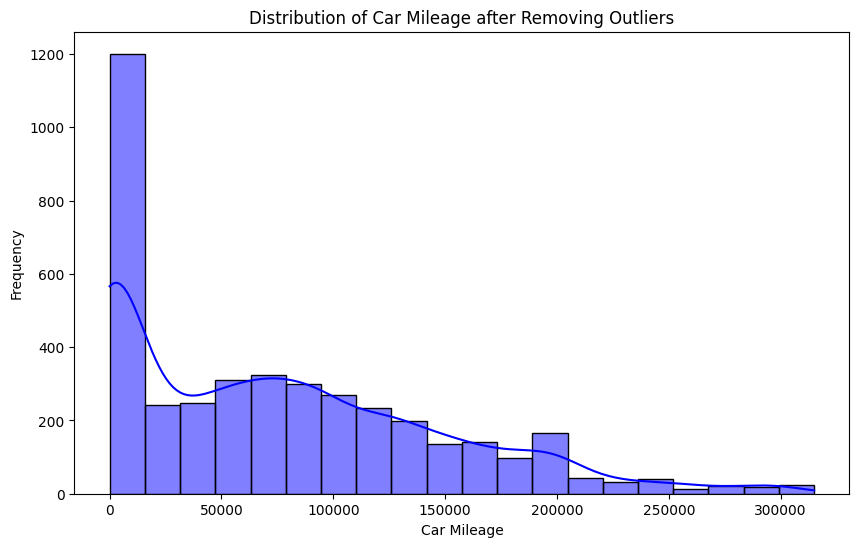

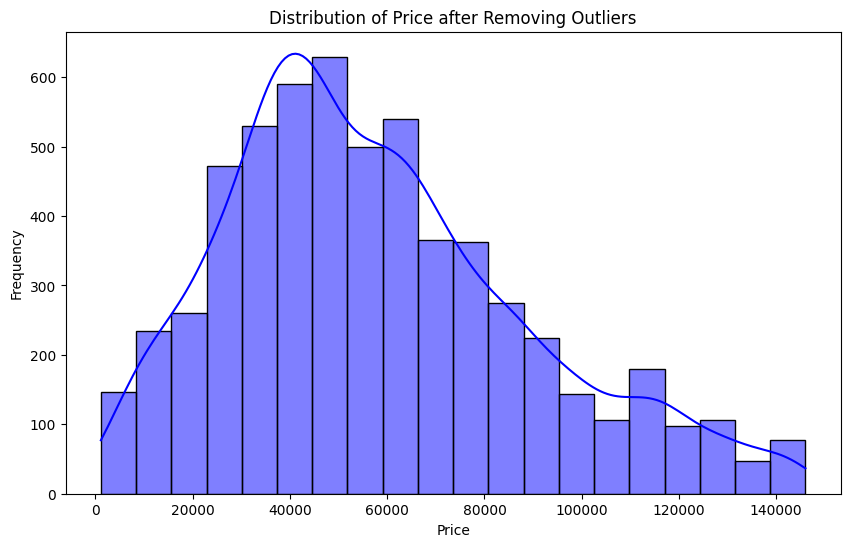

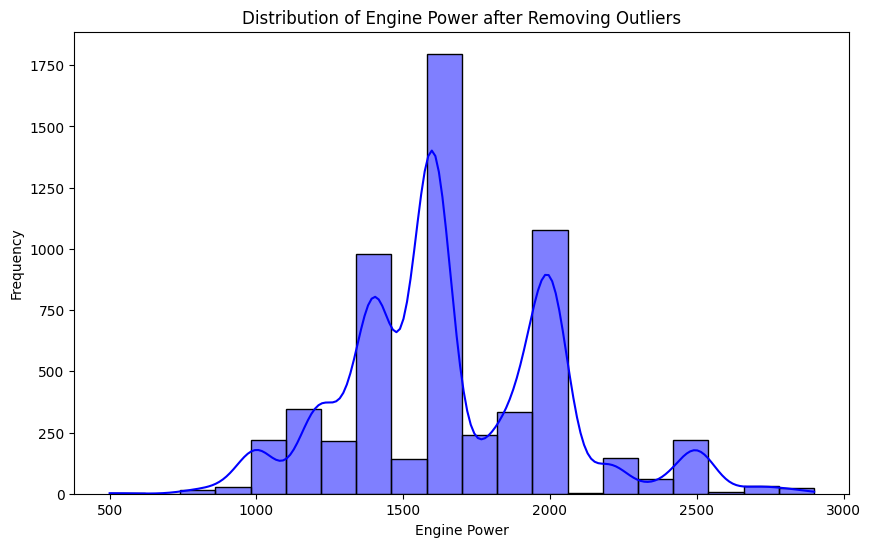

In [101]:
plot_distribution(cleaned_data, 'Car Mileage')
plot_distribution(cleaned_data, 'Price')
plot_distribution(cleaned_data, 'Engine Power')

In [102]:
cleaned_data['Car Mileage'].fillna(cleaned_data['Car Mileage'].median(), inplace=True)

In [103]:
print(cleaned_data.isnull().sum())

Model                             0
Year                              0
Price                             0
Previous Owners                   0
Offered                           0
Payment Method                    0
Number of Passengers            678
Car Mileage                       0
Engine Power                      0
Glass                             0
Transmission Type                 0
Car License                       0
Car Origin                        0
Fuel Type                         0
Car Color                         0
Third Party                       0
Comprehensive (Vehicle Body)      0
Total Insurance                   0
Alarm                           402
CD Player                       402
Air Conditioning                402
Leather Seats                   402
Airbags                         402
Sunroof                         402
Alloy Wheels                    402
Central Locking                 402
dtype: int64


In [104]:
dropped_rows_Passengers = cleaned_data[cleaned_data['Number of Passengers'].isna()].copy()
cleaned_data.dropna(subset=['Number of Passengers'], inplace=True)

In [105]:
print(cleaned_data['Number of Passengers'].unique())

['4+1' '7+1' '٤+١' '4+١' '6+1' '٧' '5+1' '6+١' '+1' '١+٤' '٥+١' '5+2'
 'مثال: 4 + 1' '1+7' '6x1' '2/1' '8+1' '٦+١' '4+2' '2+1' '000' '3+1' '1'
 'اكثر من 10' '9+1' '1+1' '7.1' '7:1' '7 =1' '2' '1+2' '7,+ 1' '٧+1'
 '4\\١' '٧+١' '1+٤']


In [106]:
# Replace values in 'Number of Passengers' column using the mapping dictionary
mapping_dict = {
    '4+1': '5',
    '7+1': '8',
    '٤+١': '5',
    '8': '8',
    '4+١': '5',
    '6+1': '7',
    '٧': '7',
    '5+1': '6',
    '2+1': '3',
    '١+٤': '5',
    '6+١': '7',
    '+1': '1',
    '٥+١': '6',
    '5+2': '7',
    '1+7': '8',
    '1+2': '3',
    '6x1': '6',
    '2/1': '2',
    '1+1': '2',
    '8+1': '9',
    '٦+١': '7',
    '4+2': '6',
    '3+1': '4',
    '1': '1',
    'اكثر من 10': '10',
    '9+1': '10',
    '6±١': '7',
    '7:1': '8',
    '7 =1': '8',
    '2': '2',
    '7,+ 1': '8',
    '٧+1': '8',
    '4\\١': '5',
    'مثال: 4 + 1':'5',
     '1+٤':'5',
     '7.1':'8',
     '٧+١':'8'

}
cleaned_data['Number of Passengers'] = cleaned_data['Number of Passengers'].replace(mapping_dict)
print(cleaned_data['Number of Passengers'].unique())

['5' '8' '7' '6' '1' '2' '9' '3' '000' '4' '10']


In [107]:
# Clean the 'Number of Passengers' column by converting valid values to integers and setting invalid values to NaN

cleaned_data['Number of Passengers'] = cleaned_data['Number of Passengers'].apply(lambda val: int(val) if str(val).isdigit() and 1 <= int(val) <= 10  else np.nan)

In [108]:
cleaned_data.dropna(subset=['Number of Passengers'], inplace=True)
cleaned_data = pd.concat([cleaned_data, dropped_rows_Passengers], ignore_index=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15376\613402389.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cleaned_data = pd.concat([cleaned_data, dropped_rows_Passengers], ignore_index=True)


In [109]:
cleaned_data['Number of Passengers'].fillna(cleaned_data['Number of Passengers'].mode()[0], inplace=True)

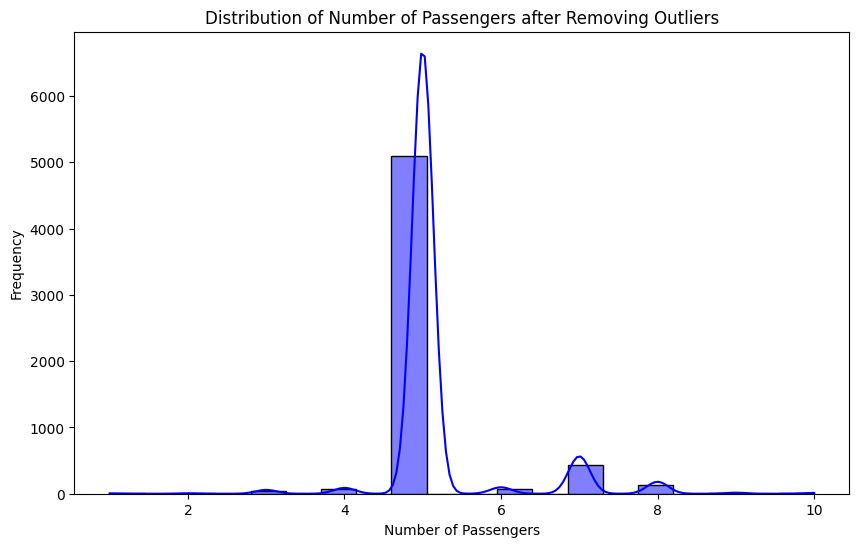

In [110]:
plot_distribution(cleaned_data, 'Number of Passengers')

In [111]:
print(cleaned_data.isnull().sum())

Model                             0
Year                              0
Price                             0
Previous Owners                   0
Offered                           0
Payment Method                    0
Number of Passengers              0
Car Mileage                       0
Engine Power                      0
Glass                             0
Transmission Type                 0
Car License                       0
Car Origin                        0
Fuel Type                         0
Car Color                         0
Third Party                       0
Comprehensive (Vehicle Body)      0
Total Insurance                   0
Alarm                           402
CD Player                       402
Air Conditioning                402
Leather Seats                   402
Airbags                         402
Sunroof                         402
Alloy Wheels                    402
Central Locking                 402
dtype: int64


In [112]:
print(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Model                         5884 non-null   object 
 1   Year                          5884 non-null   object 
 2   Price                         5884 non-null   float64
 3   Previous Owners               5884 non-null   float64
 4   Offered                       5884 non-null   object 
 5   Payment Method                5884 non-null   object 
 6   Number of Passengers          5884 non-null   float64
 7   Car Mileage                   5884 non-null   float64
 8   Engine Power                  5884 non-null   float64
 9   Glass                         5884 non-null   object 
 10  Transmission Type             5884 non-null   object 
 11  Car License                   5884 non-null   object 
 12  Car Origin                    5884 non-null   object 
 13  Fue

In [113]:
cleaned_data['Year'] = pd.to_numeric(cleaned_data['Year'], errors='coerce').astype('Int64')
cleaned_data['Price'] = pd.to_numeric(cleaned_data['Price'], errors='coerce').astype('Int64')
cleaned_data['Previous Owners'] = pd.to_numeric(cleaned_data['Previous Owners'], errors='coerce').astype('Int64')
cleaned_data['Number of Passengers'] = pd.to_numeric(cleaned_data['Number of Passengers'], errors='coerce').astype('Int64')


In [114]:
columns_to_fill = ['Alarm', 'Air Conditioning', 'Airbags', 'Sunroof', 'Central Locking', 'Leather Seats', 'CD Player', 'Alloy Wheels']
for column in columns_to_fill:
    most_frequent_value = cleaned_data[column].mode()[0]
    cleaned_data[column].fillna(most_frequent_value, inplace=True)

In [115]:
cleaned_data[columns_to_fill] = cleaned_data[columns_to_fill].astype(int)

In [116]:
numerical_columns = cleaned_data.select_dtypes(include=['float64', 'int32','Int64']).columns
# Extract numerical columns
numerical_data = cleaned_data[numerical_columns]
numerical_data

,Year,Price,Previous Owners,Number of Passengers,Car Mileage,Engine Power,Third Party,Comprehensive (Vehicle Body),Total Insurance,Alarm,CD Player,Air Conditioning,Leather Seats,Airbags,Sunroof,Alloy Wheels,Central Locking
0,2014,100000,1,5,75000.0,2000.0,1340.0,1751.0,3090.0,1,1,1,1,1,1,1,1
1,2007,60000,2,8,130000.0,2500.0,1690.0,1050.0,2740.0,1,1,1,1,1,1,1,1
2,1982,5500,0,5,65000.0,906.0,467.0,500.0,967.0,0,1,1,0,0,0,0,0
3,2015,65000,1,5,123456.0,1400.0,1035.0,1138.0,2173.0,1,1,1,1,1,0,1,1
4,2016,73000,0,5,45000.0,1200.0,1035.0,1278.0,2313.0,1,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,2014,5600,1,5,65000.0,1600.0,1340.0,1000.0,2340.0,1,1,1,1,1,0,1,1
5880,1999,30000,1,5,65000.0,2500.0,845.0,500.0,1345.0,1,1,1,1,1,0,1,1
5881,1987,5000,1,5,65000.0,1600.0,670.0,500.0,1170.0,1,1,1,1,1,0,1,1
5882,2006,70000,1,5,65000.0,2005.0,1690.0,1226.0,2915.0,1,1,1,1,1,0,1,1


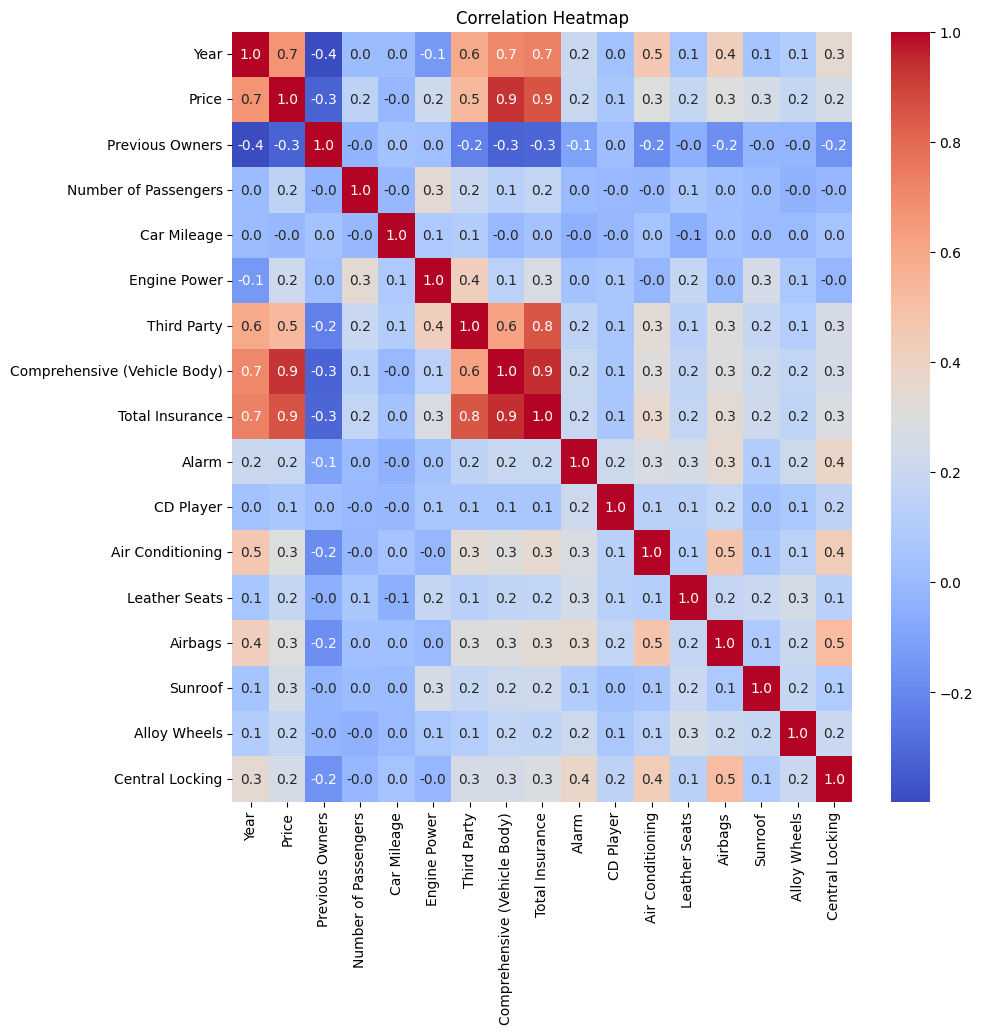

In [117]:
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

In [118]:
#They were deleted because there is no relationship between them and the price, and as for insurance, we cannot use it in prediction
columns_to_drop = ['Third Party', 'Comprehensive (Vehicle Body)', 'Total Insurance', 'Previous Owners', 'Car Mileage','Car Color']
cleaned_data = cleaned_data.drop(columns=columns_to_drop)

In [119]:
print(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 5884 non-null   object 
 1   Year                  5884 non-null   Int64  
 2   Price                 5884 non-null   Int64  
 3   Offered               5884 non-null   object 
 4   Payment Method        5884 non-null   object 
 5   Number of Passengers  5884 non-null   Int64  
 6   Engine Power          5884 non-null   float64
 7   Glass                 5884 non-null   object 
 8   Transmission Type     5884 non-null   object 
 9   Car License           5884 non-null   object 
 10  Car Origin            5884 non-null   object 
 11  Fuel Type             5884 non-null   object 
 12  Alarm                 5884 non-null   int32  
 13  CD Player             5884 non-null   int32  
 14  Air Conditioning      5884 non-null   int32  
 15  Leather Seats        

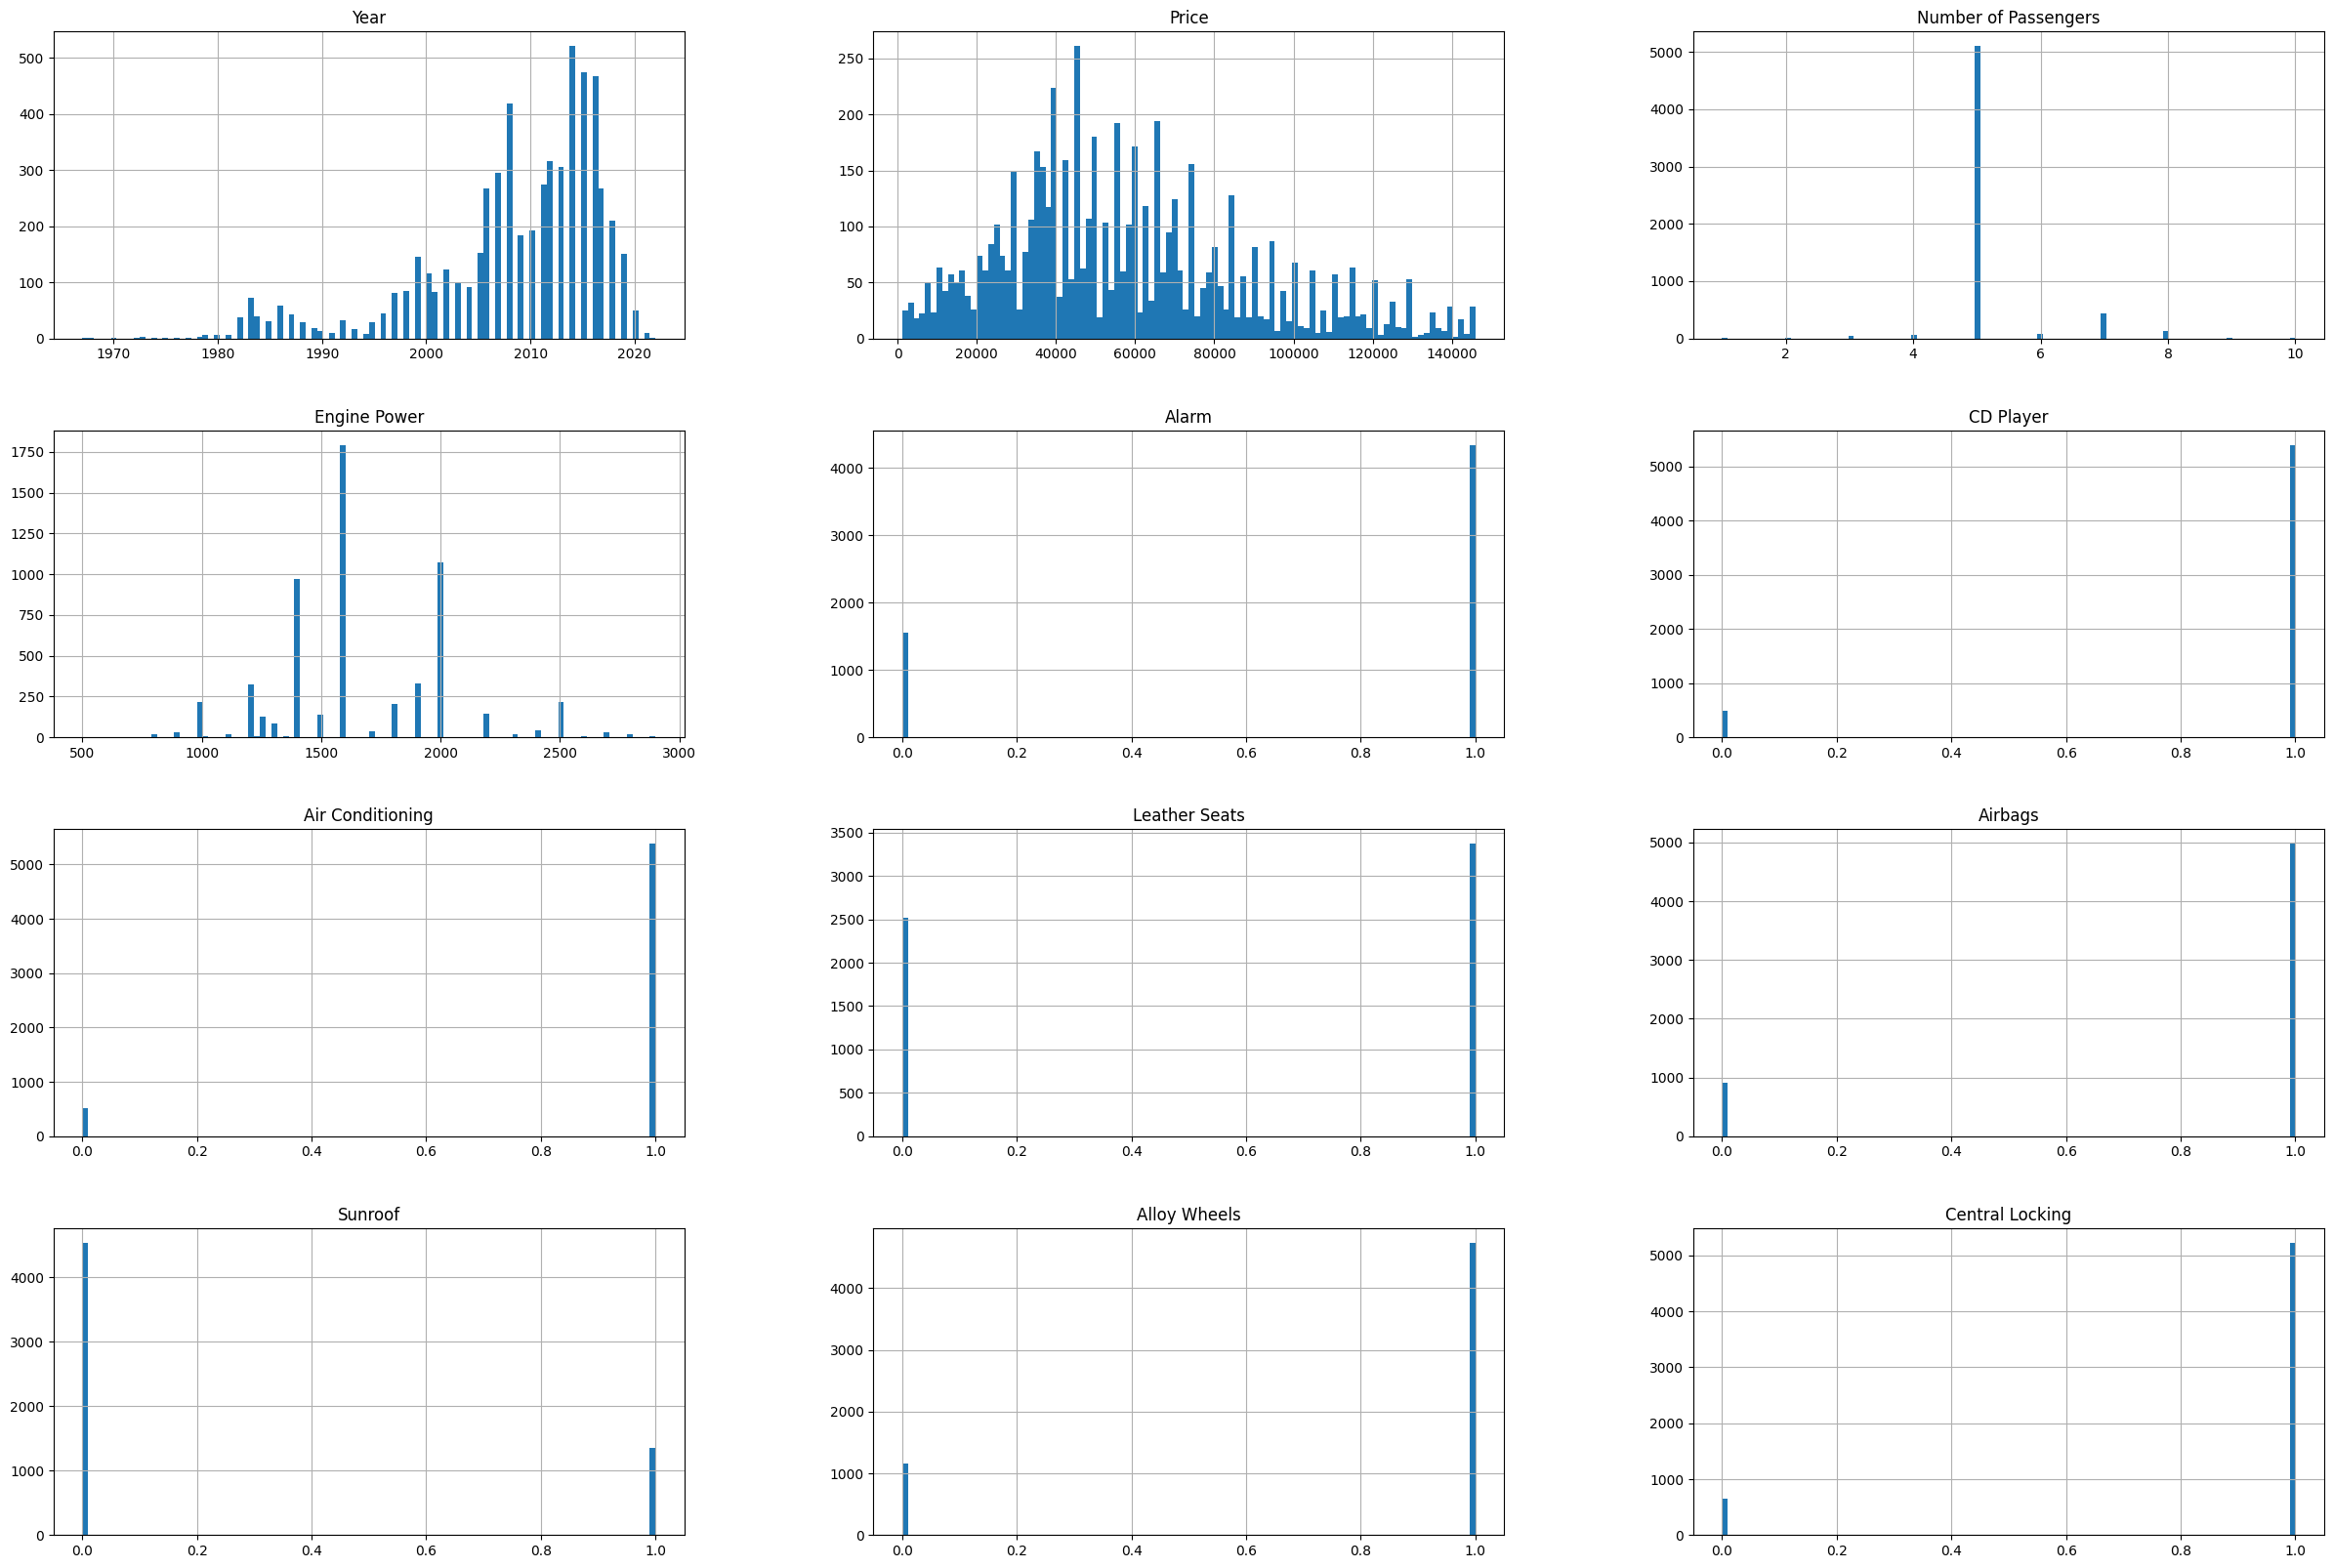

In [120]:
cleaned_data.hist(bins=100,figsize=(30,20))
plt.show()

# feature engineering

#### Normalizing a feature

In [121]:
price_scaler = MinMaxScaler()
cleaned_data['Price'] = price_scaler.fit_transform(cleaned_data[['Price']])


In [122]:
with open('price_scaler.pkl', 'wb') as file:
    pickle.dump(price_scaler, file)

In [123]:
Engine_scaler = MinMaxScaler()
# Reshape the 'Price' column to a 2D array (required by the scaler)
cleaned_data['Engine Power'] = Engine_scaler.fit_transform(cleaned_data[['Engine Power']])

In [124]:
with open('Engine_scaler.pkl', 'wb') as file:
    pickle.dump(Engine_scaler, file)

#### effectively one-hot encoding the categorical variable

In [125]:
one_hot_encoded = pd.get_dummies(cleaned_data['Offered'], prefix=None)
dcleaned_dataf = pd.concat([cleaned_data, one_hot_encoded], axis=1)

In [126]:
one_hot_encoded = pd.get_dummies(cleaned_data['Glass'], prefix=None)
cleaned_data = pd.concat([cleaned_data, one_hot_encoded], axis=1)

one_hot_encoded = pd.get_dummies(cleaned_data['Car License'], prefix=None)
cleaned_data = pd.concat([cleaned_data, one_hot_encoded], axis=1)

one_hot_encoded = pd.get_dummies(cleaned_data['Car Origin'], prefix=None)
cleaned_data = pd.concat([cleaned_data, one_hot_encoded], axis=1)

one_hot_encoded = pd.get_dummies(cleaned_data['Fuel Type'], prefix=None)
cleaned_data = pd.concat([cleaned_data, one_hot_encoded], axis=1)

one_hot_encoded = pd.get_dummies(cleaned_data['Transmission Type'], prefix=None)
cleaned_data = pd.concat([cleaned_data, one_hot_encoded], axis=1)

one_hot_encoded = pd.get_dummies(cleaned_data['Payment Method'], prefix=None)
cleaned_data = pd.concat([cleaned_data, one_hot_encoded], axis=1)

one_hot_encoded = pd.get_dummies(cleaned_data['Model'], prefix=None)
cleaned_data = pd.concat([cleaned_data, one_hot_encoded], axis=1)

In [127]:
cleaned_data

,Model,Year,Price,Offered,Payment Method,Number of Passengers,Engine Power,Glass,Transmission Type,Car License,...,هونداي سانتافيه,هونداي سنتافيه,هونداي سوناتا,هونداي فيرنا,هونداي فيلوستر,هونداي فينيو,هونداي كليك,هونداي كوبيه,هونداي كونا,هونداي ٢٠٠٦
0,كيا اوبتيما,2014,0.682516,للبيع فقط,نقدا فقط,5,0.625000,الكتروني,اوتوماتيك,فلسطينية,...,False,False,False,False,False,False,False,False,False,False
1,كيا سورينتو,2007,0.406442,للبيع أو التبديل,إمكانية التقسيط,8,0.833333,الكتروني,نصف اوتوماتيك,فلسطينية,...,False,False,False,False,False,False,False,False,False,False
2,فيات 127,1982,0.030292,للبيع فقط,إمكانية التقسيط,5,0.169167,يدوي,عادي,فلسطينية,...,False,False,False,False,False,False,False,False,False,False
3,اوبل كورسا,2015,0.440951,للبيع فقط,إمكانية التقسيط,5,0.375000,الكتروني,عادي,فلسطينية,...,False,False,False,False,False,False,False,False,False,False
4,سكودا فابيا,2016,0.496166,للبيع فقط,نقدا فقط,5,0.291667,الكتروني,اوتوماتيك,فلسطينية,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,سكودا اوكتافيا,2014,0.030982,للبيع فقط,نقدا فقط,5,0.458333,الكتروني,عادي,فلسطينية,...,False,False,False,False,False,False,False,False,False,False
5880,فولكسفاجن ترانسبورتر,1999,0.199387,للبيع أو التبديل,نقدا فقط,5,0.833333,الكتروني,عادي,فلسطينية,...,False,False,False,False,False,False,False,False,False,False
5881,اوبل اسكونا,1987,0.026841,للبيع فقط,إمكانية التقسيط,5,0.458333,الكتروني,عادي,فلسطينية,...,False,False,False,False,False,False,False,False,False,False
5882,مرسيدس باص,2006,0.475461,للبيع فقط,إمكانية التقسيط,5,0.627083,الكتروني,عادي,فلسطينية,...,False,False,False,False,False,False,False,False,False,False


In [128]:
offer_mapping = {
    'للبيع أو التبديل': 'Sale or Swap',
    'للبيع فقط': 'Sale',
    'للتبديل فقط': 'Swap',
    'تأجير': 'Rental',
    'تجاري': 'Commercial',
    'تدريب سياقة': 'Driving Training',
    'حكومي': 'Government',
    'خصوصي': 'Private',
    'عمومي': 'Public',
    'بنزين': 'Petrol',
    'ديزل': 'Diesel',
    'كهرباء': 'Electric',
    'هايبرد': 'Hybrid',
    'اوتوماتيك': 'Automatic',
    'عادي': 'Manual',
    'نصف اوتوماتيك': 'Semi-Automatic',
    'إمكانية التقسيط': 'Installment',
    'نقدا فقط': 'Cash'
}
cleaned_data = cleaned_data.rename(columns=offer_mapping)

In [129]:
cleaned_data.drop(['يدوي'], axis=1, inplace=True)
cleaned_data = cleaned_data.rename(columns={'الكتروني': 'Electronic glass'})

In [130]:
cleaned_data.drop(['نمرة صفراء'], axis=1, inplace=True)
cleaned_data = cleaned_data.rename(columns={'فلسطينية': 'is Palestinian car'})


In [131]:
cleaned_data = cleaned_data.drop(['Offered','Payment Method','Glass','Transmission Type','Car License','Fuel Type','Model','Car Origin'], axis=1)

In [132]:
cleaned_data

,Year,Price,Number of Passengers,Engine Power,Alarm,CD Player,Air Conditioning,Leather Seats,Airbags,Sunroof,...,هونداي سانتافيه,هونداي سنتافيه,هونداي سوناتا,هونداي فيرنا,هونداي فيلوستر,هونداي فينيو,هونداي كليك,هونداي كوبيه,هونداي كونا,هونداي ٢٠٠٦
0,2014,0.682516,5,0.625000,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
1,2007,0.406442,8,0.833333,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
2,1982,0.030292,5,0.169167,0,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,2015,0.440951,5,0.375000,1,1,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
4,2016,0.496166,5,0.291667,1,1,1,0,1,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,2014,0.030982,5,0.458333,1,1,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
5880,1999,0.199387,5,0.833333,1,1,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
5881,1987,0.026841,5,0.458333,1,1,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
5882,2006,0.475461,5,0.627083,1,1,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False


In [133]:
cleaned_data.replace({False:0,True:1},inplace=True)

In [134]:
cleaned_data

,Year,Price,Number of Passengers,Engine Power,Alarm,CD Player,Air Conditioning,Leather Seats,Airbags,Sunroof,...,هونداي سانتافيه,هونداي سنتافيه,هونداي سوناتا,هونداي فيرنا,هونداي فيلوستر,هونداي فينيو,هونداي كليك,هونداي كوبيه,هونداي كونا,هونداي ٢٠٠٦
0,2014,0.682516,5,0.625000,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2007,0.406442,8,0.833333,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1982,0.030292,5,0.169167,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,0.440951,5,0.375000,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2016,0.496166,5,0.291667,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,2014,0.030982,5,0.458333,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5880,1999,0.199387,5,0.833333,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5881,1987,0.026841,5,0.458333,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5882,2006,0.475461,5,0.627083,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
cleaned_data.to_csv('cleaned_data.csv', index=False)